# Report 4

## Algorithms with backtracking

#### Marcin Kapiszewski 156048
#### Adam Tomys 156057

Group 2

### Algorithms:
#### Roberts-Flores algorithm:
- we choose random node and check all possible paths (using DFS) which contain every node only once
- we build the path as long as we can (we save it on stack). If we can't build it further, we remove the last added vertex and see if we can start building further using another, next, edge
- when we have all elements in the heap we check if we can end the cycle

#### Hilholzen algorithm:
- check if Eulerian graph exists (all nodes degrees are even and not 0)
- choose random vertex v
- follow a trail of edges from that vertex until returning to v
- as long as there exists a vertex u that belongs to the current tour, but that has adjacent edges not part of the tour, start another trail from u, following unused edges until returning to u, and join the tour formed in this way to the previous tour

Chosen undirected graph representation: Adjacency List

In [2]:
from graphGenerators import generateGraphWithEC, generateGraphWithHC, generateGraphWithoutECandHC
from robertsFlores import robertsFlores
from hierholzer import hierholzer
from evaluateProgram import measureTime
from statistics import mean
import plotly.express as px
import pandas as pd

In [13]:
from IPython import display

In [3]:
densities = [0.3, 0.5, 0.7]

In [4]:
def performExpreriment(algorithm, graphGenerator, sizes, density, numberOfIterations):
    df = pd.DataFrame({"Algorithm": [],
                       "Time": [],
                       "Density": [],
                       "NoNodes": [],
                       "NoEdges": []})
    for size in sizes:
        times = []
        for _ in range(numberOfIterations):
            graph = graphGenerator(size, density)
            times.append(measureTime(algorithm, [graph]))
        time = mean(times)
        df.loc[len(df)] = {"Algorithm": algorithm.__name__,
                       "Time": time,
                       "Density": density,
                       "NoNodes": size,
                       "NoEdges": density* (size * (size - 1))/2}
    return df

In [5]:
def performExpreriments(algorithm, graphGenerator, sizes, densities, numberOfIterations = 5):
    df = pd.DataFrame({"Algorithm": [],
                        "Time": [],
                        "Density": [],
                        "NoNodes": [],
                        "NoEdges": []})
    for density in densities:
        df = pd.concat([df, performExpreriment(algorithm, graphGenerator, sizes, density, numberOfIterations)])
        print(f"Density {density} done :)")
    return df

In [6]:
def showGraph(df, path, title = "", xLabel = "NoEdges"):
    fig = px.line(df, x=xLabel, y="Time", color='Density', title=title)
    fig.write_image(path)

In [7]:
sizes = [100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
df = performExpreriments(hierholzer, generateGraphWithEC, sizes, densities, numberOfIterations=1)

Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Density 0.3 done :)
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Density 0.5 done :)
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Found Eulerian Cycle
Density 0.7 done :)


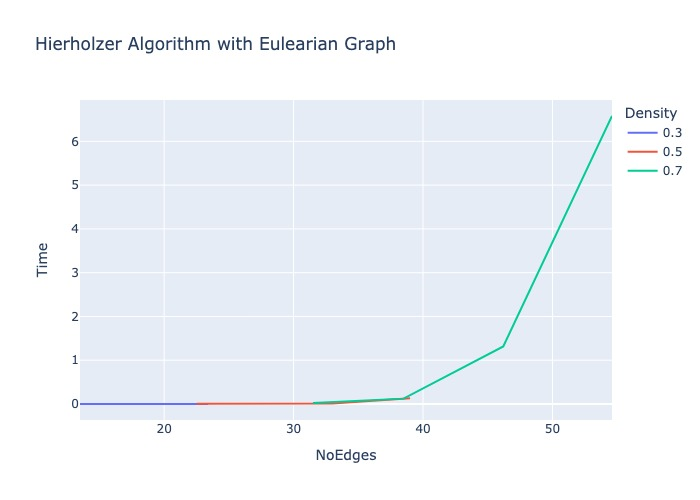

In [19]:
title = "Hierholzer Algorithm with Eulearian Graph"
path = f"graphs/{title}.jpg"
showGraph(df, path, title)
display.Image(path)

In [10]:
sizes = [1000, 2000, 3000, 4000, 5000]
df = performExpreriments(hierholzer, generateGraphWithoutECandHC, sizes, densities)

Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Density 0.3 done :)
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not found Eulerian Cycle
Not f

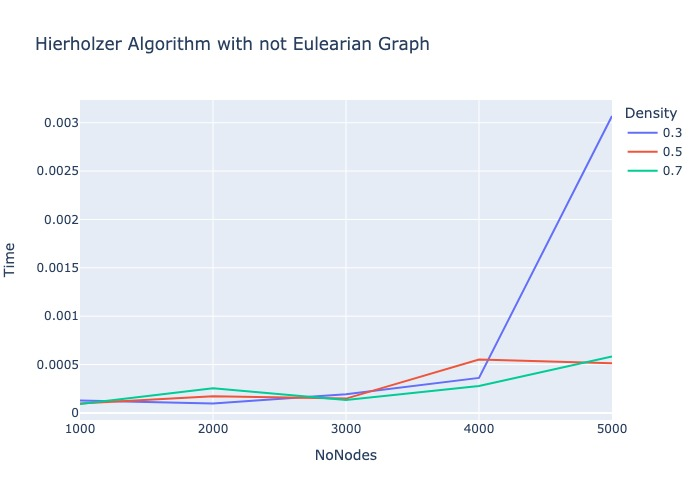

In [14]:
title = "Hierholzer Algorithm with not Eulearian Graph"
path = f"graphs/{title}.jpg"
showGraph(df, path, title, xLabel="NoNodes")
display.Image(path)

In [15]:
sizes = [10, 11, 12, 13, 14, 15]
df = performExpreriments(robertsFlores, generateGraphWithHC, sizes, densities)

Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Density 0.3 done :)
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cycle
Found Hamiltonial Cy

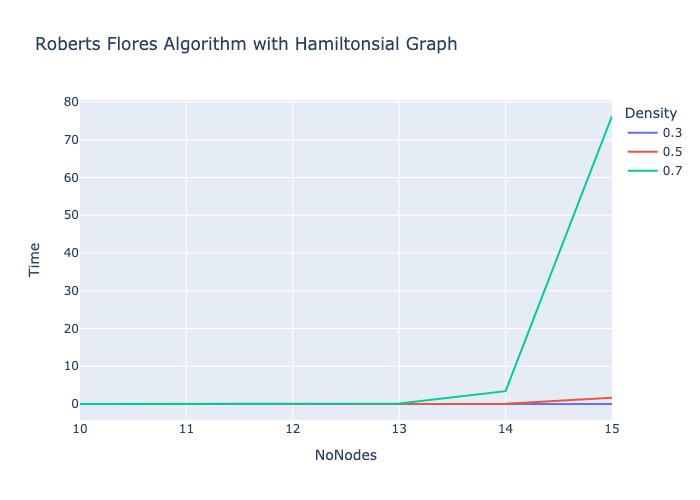

In [16]:
title = "Roberts Flores Algorithm with Hamiltonsial Graph"
path = f"graphs/{title}.jpg"
showGraph(df, path, title, xLabel="NoNodes")
display.Image(path)

In [17]:
sizes = [10, 11, 12, 13]
df = performExpreriments(robertsFlores, generateGraphWithoutECandHC, sizes, densities)

Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Density 0.3 done :)
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle
Not found Hamiltonial Cycle


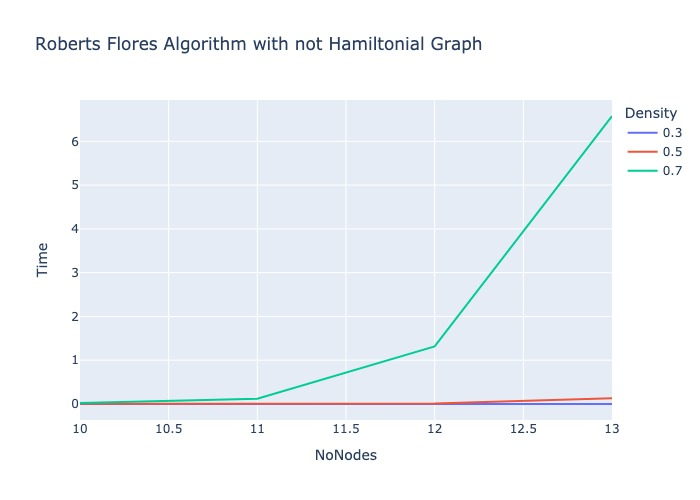

In [18]:
title = "Roberts Flores Algorithm with not Hamiltonial Graph"
path = f"graphs/{title}.jpg"
showGraph(df, path, title, xLabel="NoNodes")
display.Image(path)

### Challenges:
- code was time-consuming to implement
- code was running a long time
- finding correct parameters took a lot of trials to find, as we wanted to ensure that instances were unbiased and correct


### Conclusions:
- Eulerian cycle (Hierholzer) is a P problem
- Hamiltionian cycle (Roberts-Flores) is an NP complete problem
- Decision problem of Eulerian cycle (as shown on the graphs above) pesimistically works in time complexity of N+M
- Both algorithms work the fastest for density of 0.3
- For both algorithms as densities grow started to perform slower
- On average if Hamiltionian cycle does not exist the performance of the Roberts-Flores algorithm is much worse
- On the other hand, when the Eulerian cycle does not exist the performance of Hierhlozer algorithm depended on number of vertices and was much faster. Thanks to property that nodes need to have an even degree for this cycle to exist.